In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 메타정보가 유전자 발현량에 미치는 영향 SHAP분석

In [ ]:
import sqlite3
import pandas as pd
db_path = "/content/drive/MyDrive/BIO_MEDICAL_PROJECT/obesity_gene_analysis/data/OBESITYGENE_PROJECT.db"

In [ ]:
obesity_genes = ['FTO', 'MC4R', 'LEP', 'LEPR', 'ADIPOQ', 'PPARG', 'UCP1', 'UCP2', 'BDNF', 'GNPDA2', 'TMEM18', 'NEGR1']
# gene_list_sql = ', '.join(f"'{gene}'" for gene in obesity_genes) # 리스트를 SQL용 문자열로 변환

In [ ]:
conn = sqlite3.connect(db_path)
SHAP_metadata_df = pd.read_sql_query("""
    SELECT subject_id, treatment, sex, age_yrs, height_cm,
           base_weight_kg, base_bmi_kg_m2, base_body_fat_pct, base_pure_fat_kg
    FROM metadata
    WHERE time_point='at study start'
""", conn, index_col='subject_id')
conn.close()

In [ ]:
SHAP_metadata_df.shape

(51, 8)

In [ ]:
dummies_SHAP_metadata_df = pd.get_dummies(SHAP_metadata_df, columns=['treatment', 'sex'], drop_first=True)

In [ ]:
dummies_SHAP_metadata_df

,age_yrs,height_cm,base_weight_kg,base_bmi_kg_m2,base_body_fat_pct,base_pure_fat_kg,treatment_very-low-calorie diet,sex_male
subject_id,,,,,,,,
1,46.0,167.0,83.38,29.90,39.9,33.26862,True,False
2,45.0,164.0,80.94,30.09,46.7,37.79898,True,False
3,52.0,178.5,99.62,31.27,27.2,27.09664,True,True
4,41.0,154.0,80.34,33.88,46.5,37.35810,True,False
5,56.0,179.0,96.67,30.17,32.9,31.80443,True,True
6,66.0,158.5,82.09,32.68,47.4,38.91066,False,False
8,48.0,165.0,78.25,28.74,46.2,36.15150,False,False
9,53.0,169.5,97.56,33.96,55.0,53.65800,False,False
10,40.0,172.0,100.01,33.81,45.3,45.30453,False,False


In [ ]:
# y 데이터프레임이 될 것
query = f"""
SELECT
    E.subject_id,
    P.gene_symbol,
    E.exp_C_A
FROM expression_change AS E
JOIN platform AS P ON E.ID_REF = P.ID
"""

conn = sqlite3.connect(db_path)
total_genes_symbols_exp_C_A_df = pd.read_sql_query(query, conn)

In [ ]:
len(total_genes_symbols_exp_C_A_df['gene_symbol'].unique().tolist())

20255

In [ ]:
total_genes_symbols_exp_C_A_df.shape

(1764741, 3)

In [ ]:
filtered_total_genes_symbols_exp_C_A_df = total_genes_symbols_exp_C_A_df[total_genes_symbols_exp_C_A_df['gene_symbol'].notnull()]

In [ ]:
filtered_total_genes_symbols_exp_C_A_df

,subject_id,gene_symbol,exp_C_A
4203,1,OR4F17,-0.224340
4204,1,SEPT14,-0.001109
4205,1,OR4F16,0.661846
4208,1,GPAM,0.036163
4210,1,LOC100287934,0.178458
...,...,...,...
1764509,61,RXRB,-0.092560
1764510,61,VPS52,0.069049
1764511,61,RGL2,0.117062
1764512,61,TAPBP,-0.297992


In [ ]:
total_genes_symbols_exp_C_A_df

,subject_id,gene_symbol,exp_C_A
0,1,None,-0.402629
1,1,None,1.251101
2,1,None,-1.115590
3,1,None,0.849925
4,1,None,-1.044279
...,...,...,...
1764736,61,None,-0.522933
1764737,61,None,-0.023247
1764738,61,None,0.040307
1764739,61,None,-0.013860


In [ ]:
pivot_filtered_total_genes_symbols_exp_C_A_df = filtered_total_genes_symbols_exp_C_A_df.pivot_table(
    index='subject_id',
    columns='gene_symbol',
    values='exp_C_A')

In [ ]:
pivot_filtered_total_genes_symbols_exp_C_A_df

gene_symbol,A1BG,A1CF,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,AACS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
subject_id,,,,,,,,,,,,,,,,,,,,,
1,-0.203501,-0.257881,-0.076882,-0.070258,-0.053789,0.359254,-0.525279,-0.250846,0.081067,0.004297,...,0.203297,-0.789169,0.054097,-0.100937,-0.061814,0.180741,-0.074276,0.131013,-0.009875,0.059363
10,-0.289141,0.304956,-0.136773,-0.200091,-0.079607,-0.082132,-0.199102,-0.014800,0.011206,-0.147787,...,-0.271067,0.472637,0.128869,-0.576064,0.290886,-0.395441,0.254112,0.090162,-0.000692,-0.381745
11,-0.018572,0.201289,0.048916,0.176325,0.179518,0.082603,-0.238181,0.127768,-0.369594,-0.065608,...,-0.340940,-0.229782,-0.160442,0.269090,-0.080181,-0.094051,-0.304135,-0.041985,-0.288120,0.045331
12,-0.364803,-0.186572,0.010086,0.158080,-0.691446,0.133029,-0.342992,-0.272503,0.193401,-0.209218,...,0.237398,0.237283,0.058561,-0.223919,-0.022895,0.357639,0.042628,-0.013599,0.232416,0.234180
13,0.068879,-0.071343,-0.361604,0.083380,-0.186179,-0.366747,-0.017106,0.168394,0.034616,-0.329525,...,-0.272767,0.341191,0.093876,-0.208187,0.128282,-0.346685,-0.085323,0.542646,-0.346277,0.167544
14,0.281799,-0.355884,-0.035775,-0.153475,0.017159,-0.201125,0.173375,-0.176636,-0.500170,-0.202860,...,-0.330408,0.657490,0.085367,-0.208483,-0.136246,-0.141856,-0.175162,-0.142296,-0.021148,0.337131
18,-0.648461,-0.394088,0.078309,0.289820,-0.649276,-0.237888,-0.398332,-0.746614,-0.015811,0.081993,...,-1.397364,-0.437187,0.083598,-0.418047,0.086827,0.062638,-0.349114,0.255005,0.288087,-0.521277
19,0.743935,-0.111559,0.508087,0.021051,-0.666260,0.054175,-0.278458,0.076177,0.575289,0.613777,...,0.208418,1.111191,0.236500,-0.320331,-0.070009,0.178334,0.167641,-0.109791,-0.137900,-0.014339
2,-0.063825,-0.235455,0.045844,0.073061,0.365945,0.051688,0.310467,0.088913,-0.407162,-0.867728,...,-0.427302,-0.282632,0.320404,0.245004,-0.372646,0.189487,0.089606,-0.117723,-0.576978,-0.210223


In [ ]:
pivot_filtered_total_genes_symbols_exp_C_A_df[obesity_genes].shape

(49, 12)

In [ ]:
X=dummies_SHAP_metadata_df
y=pivot_filtered_total_genes_symbols_exp_C_A_df[obesity_genes]

In [ ]:
print(X.shape)
print(y.shape)

(51, 8)
(49, 12)


In [57]:
# 공통 인덱스 (subject_id) 추출
common_index = X.index.intersection(y.index)

# 공통 인덱스 기준으로 X, y 정렬 및 필터링
X_common = X.loc[common_index]
y_common = y.loc[common_index]

In [58]:
print(X_common.shape)
print(y_common.shape)
print(X_common.index.equals(y_common.index))  # True여야 안전

(49, 8)
(49, 12)
True


In [59]:
X_common

,age_yrs,height_cm,base_weight_kg,base_bmi_kg_m2,base_body_fat_pct,base_pure_fat_kg,treatment_very-low-calorie diet,sex_male
subject_id,,,,,,,,
1,46.0,167.0,83.38,29.90,39.9,33.26862,True,False
2,45.0,164.0,80.94,30.09,46.7,37.79898,True,False
3,52.0,178.5,99.62,31.27,27.2,27.09664,True,True
4,41.0,154.0,80.34,33.88,46.5,37.35810,True,False
5,56.0,179.0,96.67,30.17,32.9,31.80443,True,True
6,66.0,158.5,82.09,32.68,47.4,38.91066,False,False
8,48.0,165.0,78.25,28.74,46.2,36.15150,False,False
9,53.0,169.5,97.56,33.96,55.0,53.65800,False,False
10,40.0,172.0,100.01,33.81,45.3,45.30453,False,False


In [60]:
y_common

gene_symbol,FTO,MC4R,LEP,LEPR,ADIPOQ,PPARG,UCP1,UCP2,BDNF,GNPDA2,TMEM18,NEGR1
subject_id,,,,,,,,,,,,
1,-0.013301,-0.190319,-0.465870,-0.024795,-0.196041,0.229769,0.124143,-0.228980,-0.525472,-0.096386,-0.115466,0.059389
2,-0.356816,0.708908,-0.979490,-0.217327,-0.518054,-0.143799,-0.034194,-0.115870,-0.098243,-0.804076,-0.520102,-0.718610
3,-0.346506,0.561015,-0.856264,-0.171752,-0.175765,-0.265013,0.020825,-0.627746,0.052859,-0.531192,-0.115155,-0.321195
4,0.199921,0.149483,0.363810,0.097061,0.076487,0.569511,-0.184525,-0.246991,-0.070360,-0.152159,0.284621,0.107066
5,0.835166,-0.343142,0.799537,0.690802,1.300431,0.848258,-0.435016,0.980257,-0.161544,0.605579,0.681693,0.441042
6,-0.225121,0.466712,-0.476599,-0.305968,-0.049754,-0.039589,-0.088010,0.180371,0.187668,-0.478120,-0.025479,0.090123
8,0.033455,-0.239153,-0.530509,0.041845,0.258315,0.296417,-0.021659,-0.134543,-0.211862,0.124076,0.445940,-0.225988
9,-0.189385,0.002838,-0.408701,-0.236623,-0.117022,-0.086714,0.012217,-0.015117,-0.015411,-0.397454,-0.494464,-0.191178
10,0.041325,0.193810,-0.338549,0.074902,0.115678,0.044412,0.091644,-0.232968,0.129059,-0.248120,0.426791,0.084508


In [61]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

model.fit(X_common, y_common)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [85]:
import shap
import pandas as pd
import numpy as np
from tqdm import tqdm

gene_shap_dict = {}

# 유전자별로 SHAP 계산 (총 12개 모델)
for i, gene_name in tqdm(enumerate(obesity_genes), total=len(obesity_genes)):
    # i번째 유전자 모델 추출
    single_model = model.estimators_[i]

    # SHAP explainer
    explainer = shap.TreeExplainer(single_model)
    shap_values = explainer.shap_values(X_common)  # (n_samples, n_features)

    # 평균 절댓값 SHAP
    mean_abs_shap = np.abs(shap_values).mean(axis=0)  # (n_features,)

    # 저장
    gene_shap_dict[gene_name] = mean_abs_shap

gene_feature_shap_df = pd.DataFrame(gene_shap_dict, index=X_common.columns).T

100%|██████████| 12/12 [00:01<00:00, 11.09it/s]


In [86]:
gene_feature_shap_df

,age_yrs,height_cm,base_weight_kg,base_bmi_kg_m2,base_body_fat_pct,base_pure_fat_kg,treatment_very-low-calorie diet,sex_male
FTO,0.024396,0.048932,0.017705,0.016789,0.021205,0.017877,0.007330,0.000506
MC4R,0.037202,0.033938,0.036039,0.055241,0.105616,0.060623,0.031636,0.001367
LEP,0.031045,0.078640,0.085955,0.034957,0.036943,0.043854,0.006563,0.025611
LEPR,0.051040,0.012464,0.023536,0.027651,0.017845,0.023835,0.025372,0.000836
ADIPOQ,0.033637,0.037371,0.019003,0.044091,0.030054,0.021423,0.004609,0.002787
PPARG,0.016848,0.089543,0.014671,0.021016,0.021160,0.018160,0.002605,0.003103
UCP1,0.009670,0.025713,0.029739,0.040218,0.027195,0.032189,0.002333,0.001484
UCP2,0.043731,0.044861,0.061267,0.028620,0.044469,0.051380,0.003543,0.009615
BDNF,0.038756,0.010162,0.012881,0.065233,0.022198,0.052491,0.004013,0.000843
GNPDA2,0.042853,0.031811,0.040379,0.036711,0.032662,0.060492,0.039188,0.001180


In [87]:
gene_feature_shap_df.shape

(12, 8)

### Feature 중요도 vs 편차 시각화 코드

In [88]:
import matplotlib.pyplot as plt

# 평균 중요도와 표준편차 계산
mean_importance = gene_feature_shap_df.mean(axis=0)
std_importance = gene_feature_shap_df.std(axis=0)

# 중요도 기준으로 정렬
sorted_features = mean_importance.sort_values(ascending=False).index
mean_sorted = mean_importance[sorted_features]
std_sorted = std_importance[sorted_features]

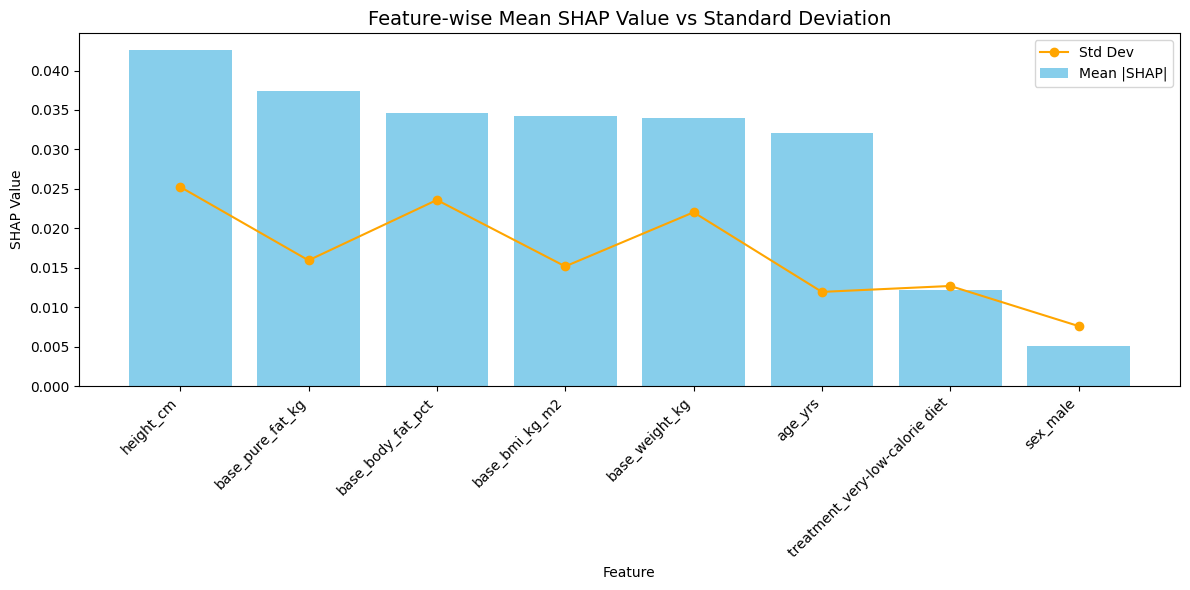

In [89]:
# 시각화
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Bar: 평균 중요도
ax.bar(sorted_features, mean_sorted, color='skyblue', label='Mean |SHAP|')

# Line: 표준편차
ax.plot(sorted_features, std_sorted, color='orange', marker='o', label='Std Dev')

plt.title("Feature-wise Mean SHAP Value vs Standard Deviation", fontsize=14)
plt.ylabel("SHAP Value")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### z-score

axis=0이냐 axis=1이냐에 따라

In [90]:
gene_feature_shap_df

,age_yrs,height_cm,base_weight_kg,base_bmi_kg_m2,base_body_fat_pct,base_pure_fat_kg,treatment_very-low-calorie diet,sex_male
FTO,0.024396,0.048932,0.017705,0.016789,0.021205,0.017877,0.007330,0.000506
MC4R,0.037202,0.033938,0.036039,0.055241,0.105616,0.060623,0.031636,0.001367
LEP,0.031045,0.078640,0.085955,0.034957,0.036943,0.043854,0.006563,0.025611
LEPR,0.051040,0.012464,0.023536,0.027651,0.017845,0.023835,0.025372,0.000836
ADIPOQ,0.033637,0.037371,0.019003,0.044091,0.030054,0.021423,0.004609,0.002787
PPARG,0.016848,0.089543,0.014671,0.021016,0.021160,0.018160,0.002605,0.003103
UCP1,0.009670,0.025713,0.029739,0.040218,0.027195,0.032189,0.002333,0.001484
UCP2,0.043731,0.044861,0.061267,0.028620,0.044469,0.051380,0.003543,0.009615
BDNF,0.038756,0.010162,0.012881,0.065233,0.022198,0.052491,0.004013,0.000843
GNPDA2,0.042853,0.031811,0.040379,0.036711,0.032662,0.060492,0.039188,0.001180


In [91]:
from scipy.stats import zscore

# z-score 계산
z_array_1 = zscore(gene_feature_shap_df, axis=1)
z_array_0 = zscore(gene_feature_shap_df, axis=0)

# numpy.ndarray-> DataFrame으로 다시 변환
gene_shap_zscore_df_1 = pd.DataFrame(z_array_1, index=gene_feature_shap_df.index, columns=gene_feature_shap_df.columns)
gene_shap_zscore_df_0 = pd.DataFrame(z_array_0, index=gene_feature_shap_df.index, columns=gene_feature_shap_df.columns)

In [92]:
# 유전자별로 가장 민감한 Feature Top-3
topk_gene_to_feature = {}

for gene in gene_shap_zscore_df_1.index:
    top_features = gene_shap_zscore_df_1.loc[gene].sort_values(ascending=False)
    topk_gene_to_feature[gene] = top_features  # 전체 저장

# 결과 확인 시 Top-3만 출력
print("🧬 유전자별 Top-3 민감 Feature:")
for gene, feats in topk_gene_to_feature.items():
    top3 = feats.head(3)  # 출력 시에만 자르기
    print(f"{gene}: {list(top3.index)} (z: {top3.values.round(2)})")

🧬 유전자별 Top-3 민감 Feature:
FTO: ['height_cm', 'age_yrs', 'base_body_fat_pct'] (z: [2.22 0.38 0.14])
MC4R: ['base_body_fat_pct', 'base_pure_fat_kg', 'base_bmi_kg_m2'] (z: [2.14 0.55 0.36])
LEP: ['base_weight_kg', 'height_cm', 'base_pure_fat_kg'] (z: [1.72 1.43 0.04])
LEPR: ['age_yrs', 'base_bmi_kg_m2', 'treatment_very-low-calorie diet'] (z: [2.1  0.36 0.19])
ADIPOQ: ['base_bmi_kg_m2', 'height_cm', 'age_yrs'] (z: [1.43 0.95 0.68])
PPARG: ['height_cm', 'base_body_fat_pct', 'base_bmi_kg_m2'] (z: [ 2.55 -0.09 -0.09])
UCP1: ['base_bmi_kg_m2', 'base_pure_fat_kg', 'base_weight_kg'] (z: [1.4  0.82 0.64])
UCP2: ['base_weight_kg', 'base_pure_fat_kg', 'height_cm'] (z: [1.33 0.81 0.47])
BDNF: ['base_bmi_kg_m2', 'base_pure_fat_kg', 'age_yrs'] (z: [1.77 1.2  0.58])
GNPDA2: ['base_pure_fat_kg', 'age_yrs', 'base_weight_kg'] (z: [1.6  0.46 0.3 ])
TMEM18: ['base_pure_fat_kg', 'base_body_fat_pct', 'height_cm'] (z: [1.34 0.93 0.72])
NEGR1: ['height_cm', 'base_weight_kg', 'age_yrs'] (z: [2.05 0.85 0.08])


In [93]:
topk_gene_to_feature

{'FTO': height_cm                          2.224848
 age_yrs                            0.380015
 base_body_fat_pct                  0.140056
 base_pure_fat_kg                  -0.110209
 base_weight_kg                    -0.123128
 base_bmi_kg_m2                    -0.192002
 treatment_very-low-calorie diet   -0.903249
 sex_male                          -1.416332
 Name: FTO, dtype: float64,
 'MC4R': base_body_fat_pct                  2.140968
 base_pure_fat_kg                   0.546344
 base_bmi_kg_m2                     0.355605
 age_yrs                           -0.283738
 base_weight_kg                    -0.324946
 height_cm                         -0.399414
 treatment_very-low-calorie diet   -0.481017
 sex_male                          -1.553803
 Name: MC4R, dtype: float64,
 'LEP': base_weight_kg                     1.722012
 height_cm                          1.429141
 base_pure_fat_kg                   0.036363
 base_body_fat_pct                 -0.240363
 base_bmi_kg_m2      

In [94]:
# Feature별로 전체 민감 유전자 저장
topk_feature_to_gene = {}

for feature in gene_shap_zscore_df_0.columns:
    top_genes = gene_shap_zscore_df_0[feature].sort_values(ascending=False)
    topk_feature_to_gene[feature] = top_genes  # 전체 저장

# 결과 확인 시 Top-3만 출력
print("\n📊 Feature별 Top-3 민감 유전자:")
for feat, genes in topk_feature_to_gene.items():
    top3 = genes.head(3)
    print(f"{feat}: {list(top3.index)} (z: {top3.values.round(2)})")


📊 Feature별 Top-3 민감 유전자:
age_yrs: ['LEPR', 'UCP2', 'GNPDA2'] (z: [1.66 1.02 0.94])
height_cm: ['PPARG', 'LEP', 'NEGR1'] (z: [1.94 1.49 1.14])
base_weight_kg: ['LEP', 'UCP2', 'NEGR1'] (z: [2.46 1.29 0.64])
base_bmi_kg_m2: ['BDNF', 'MC4R', 'ADIPOQ'] (z: [2.14 1.45 0.68])
base_body_fat_pct: ['MC4R', 'UCP2', 'LEP'] (z: [3.15 0.44 0.11])
base_pure_fat_kg: ['MC4R', 'GNPDA2', 'BDNF'] (z: [1.52 1.52 0.99])
treatment_very-low-calorie diet: ['GNPDA2', 'MC4R', 'LEPR'] (z: [2.22 1.6  1.08])
sex_male: ['LEP', 'NEGR1', 'UCP2'] (z: [2.82 1.12 0.62])


In [95]:
topk_feature_to_gene

{'age_yrs': LEPR      1.660955
 UCP2      1.021379
 GNPDA2    0.944536
 BDNF      0.586043
 MC4R      0.450003
 ADIPOQ    0.137992
 NEGR1     0.066204
 LEP      -0.088778
 FTO      -0.670628
 TMEM18   -0.817182
 PPARG    -1.331171
 UCP1     -1.959354
 Name: age_yrs, dtype: float64,
 'height_cm': PPARG     1.942841
 LEP       1.491751
 NEGR1     1.144838
 FTO       0.262675
 UCP2      0.094283
 ADIPOQ   -0.215587
 MC4R     -0.357629
 GNPDA2   -0.445643
 TMEM18   -0.632297
 UCP1     -0.697908
 LEPR     -1.246027
 BDNF     -1.341296
 Name: height_cm, dtype: float64,
 'base_weight_kg': LEP       2.464996
 UCP2      1.294340
 NEGR1     0.644478
 GNPDA2    0.303861
 MC4R      0.098080
 UCP1     -0.200672
 LEPR     -0.494815
 ADIPOQ   -0.709733
 TMEM18   -0.714033
 FTO      -0.771308
 PPARG    -0.915164
 BDNF     -1.000030
 Name: base_weight_kg, dtype: float64,
 'base_bmi_kg_m2': BDNF      2.138531
 MC4R      1.450577
 ADIPOQ    0.682856
 UCP1      0.416217
 GNPDA2    0.174746
 LEP       0.05

'유전자별 Top-3 민감 Feature'와 'Feature별 Top-3 민감 유전자'가 서로 중복되는 것이 있는지 의문이 생겨 아래 그룹 분류를 진행하였음

In [96]:
import pandas as pd

# topk_gene_to_feature 기반 gene_data 만들기
gene_rows = []
for gene, series in topk_gene_to_feature.items():
    for feat, z in series.items():
        gene_rows.append({'Gene': gene, 'Feature': feat.strip(), 'Z_gene': z})
gene_df = pd.DataFrame(gene_rows)

# 2. feature_data 만들기 (feature → gene 기준)
feat_rows = []
# Feature별로 유전자 그룹핑
for feat in gene_df['Feature'].unique():
    temp = gene_df[gene_df['Feature'] == feat].sort_values('Z_gene', ascending=False)
    for _, row in temp.iterrows():
        feat_rows.append({'Gene': row['Gene'], 'Feature': feat, 'Z_feat': row['Z_gene']})
feat_df = pd.DataFrame(feat_rows)

In [97]:
# 3. Feature별 상위 3개만 유지
feat_df = feat_df.sort_values(['Feature', 'Z_feat'], ascending=[True, False])
feat_df = feat_df.groupby('Feature').head(3)

# 4. Gene별 상위 3개만 유지
gene_df = gene_df.sort_values(['Gene', 'Z_gene'], ascending=[True, False])
gene_df = gene_df.groupby('Gene').head(3)

# 5. 병합
merged_df = pd.merge(gene_df, feat_df, on=['Gene', 'Feature'], how='outer')

In [98]:
# 6. 그룹 분류 (숫자 기반)
def classify_relation(row):
    g, f = row['Z_gene'], row['Z_feat']
    g_valid = pd.notna(g) and g >= 1.48
    f_valid = pd.notna(f) and f >= 1.48
    if g_valid and f_valid:
        return 0  # 교집합
    elif g_valid:
        return 1  # 유전자 기준만
    elif f_valid:
        return 2  # Feature 기준만
    else:
        return None

merged_df['Group'] = merged_df.apply(classify_relation, axis=1)
final_df = merged_df[merged_df['Group'].notnull()].sort_values('Group')

In [99]:
final_df.shape

(8, 5)

In [100]:
final_df

,Gene,Feature,Z_gene,Z_feat,Group
4,BDNF,base_bmi_kg_m2,1.772015,1.772015,0.0
8,FTO,height_cm,2.224848,2.224848,0.0
10,GNPDA2,base_pure_fat_kg,1.604242,1.604242,0.0
14,LEP,base_weight_kg,1.722012,1.722012,0.0
17,LEPR,age_yrs,2.100970,2.100970,0.0
21,MC4R,base_body_fat_pct,2.140968,2.140968,0.0
26,NEGR1,height_cm,2.052449,2.052449,0.0
30,PPARG,height_cm,2.551835,2.551835,0.0


| Z-score  | 누적 비율(%) | 의미                            |
| -------- | -------- | ----------------------------- |
| 1.0      | 84.1%    | 상위 15.9% 이상                   |
| 1.28     | 90%      | 상위 10% 이상                     |
| **1.48** | **93%**  | 상위 약 **7% 이상**                |
| 1.64     | 95%      | 상위 5% 이상                      |
| 1.96     | 97.5%    | 상위 2.5% 이상 (95% 신뢰구간 기준 양쪽 합) |


### **2. 유전자 기준만 민감 (Z_gene ≥ 1.48 & Z_feat < 1.48 or NaN)**

**의미:**
유전자 모델 기준으로 해당 Feature가 해당 유전자 발현에 큰 영향을 줌.

하지만, 전체 Feature 기준에서는 이 유전자가 가장 민감한 대상은 아님.


**해석 팁:**
이 Feature는 특정 유전자에 국소적으로만 중요한 영향력을 미침.

실험적 조절이 가능한 Feature라면 타겟 유전자 조절용 후보로 볼 수 있음.



### **3. Feature 기준만 민감 (Z_gene < 1.48 or NaN & Z_feat ≥ 1.48)**

**의미:**
이 Feature는 여러 유전자 중 이 특정 유전자에 가장 민감하게 반응함.

하지만, 해당 유전자의 입장에서는 이 Feature가 꼭 중요한 요인은 아님.

**해석 팁:**
이 Feature를 통해 해당 유전자를 추적하거나 특징지을 수 있음.

진단용 바이오마커 후보로 해석 가능성 있음 (Feature → Gene)


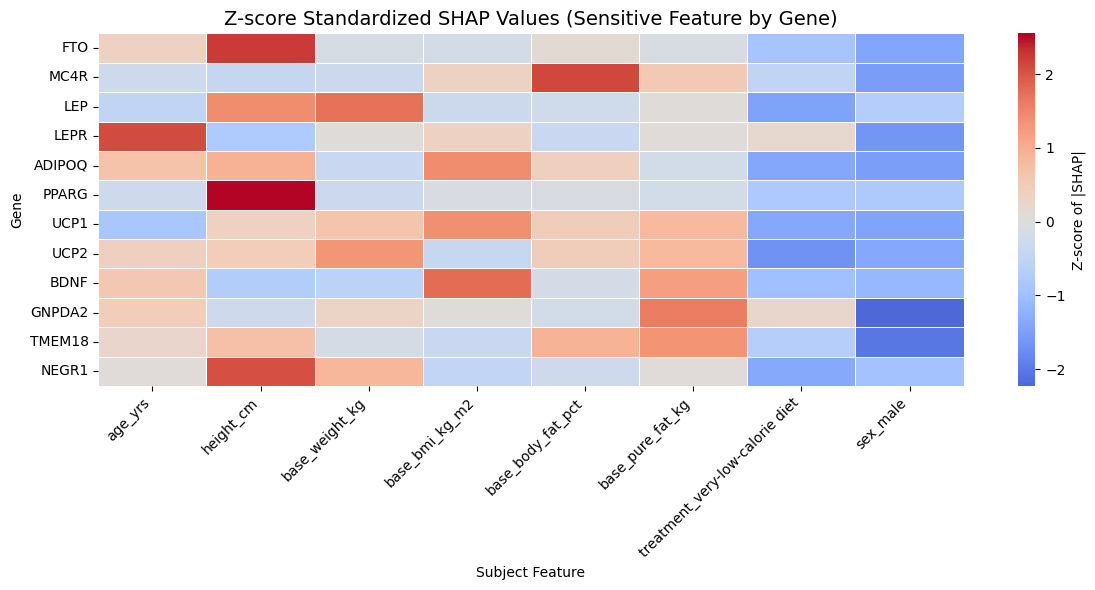

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(gene_shap_zscore_df_1, cmap='coolwarm', center=0, annot=False, fmt=".2f",
            linewidths=0.5, cbar_kws={'label': 'Z-score of |SHAP|'})

# 각 유전자(Gene) 마다, 어떤 Feature가 해당 유전자에 얼마나 큰 영향을 미쳤는지를 상대적으로 판단하는 기준임.
plt.title("Z-score Standardized SHAP Values (Sensitive Feature by Gene)", fontsize=14)
plt.xlabel("Subject Feature")
plt.ylabel("Gene")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

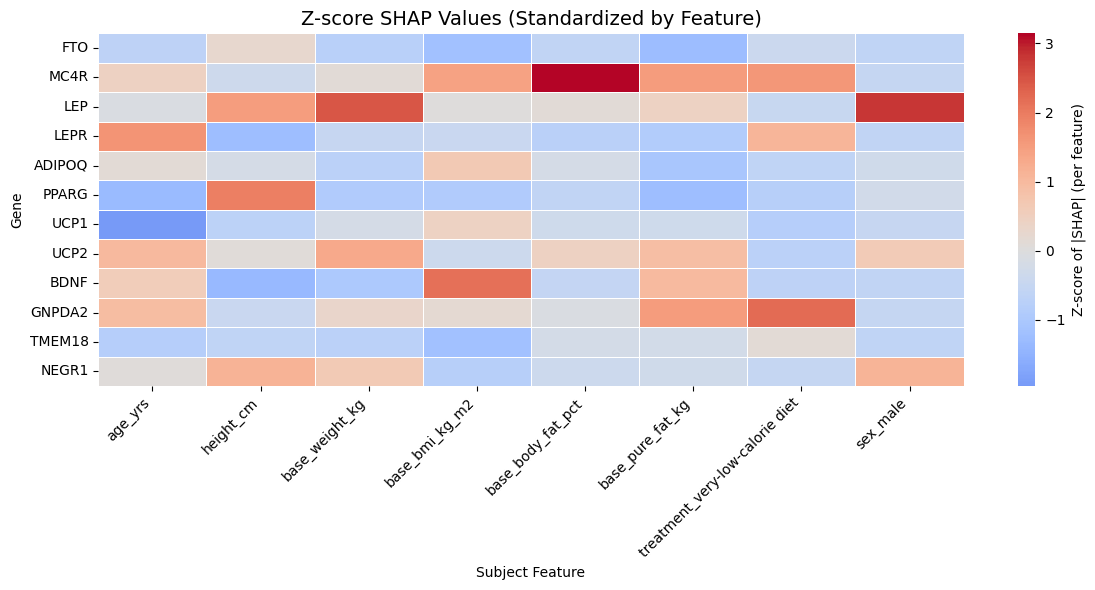

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(gene_shap_zscore_df_0, cmap='coolwarm', center=0, annot=False, fmt=".2f",
            linewidths=0.5, cbar_kws={'label': 'Z-score of |SHAP| (per feature)'})

# 각 Feature 입장에서, 어떤 유전자(Gene) 가 그 Feature 예측에 가장 민감하게 반응했는지를 보는 것.
plt.title("Z-score SHAP Values (Standardized by Feature)", fontsize=14)
plt.xlabel("Subject Feature")
plt.ylabel("Gene")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [103]:
obesity_genes = ['FTO', 'MC4R', 'LEP', 'LEPR', 'ADIPOQ', 'PPARG',
                 'UCP1', 'UCP2', 'BDNF', 'GNPDA2', 'TMEM18', 'NEGR1']

각각의 유전자 타깃 모델이 어떤 입력 Feature에 민감하게 반응하는지를 시각적으로 보여줌

🧬 SHAP for: FTO


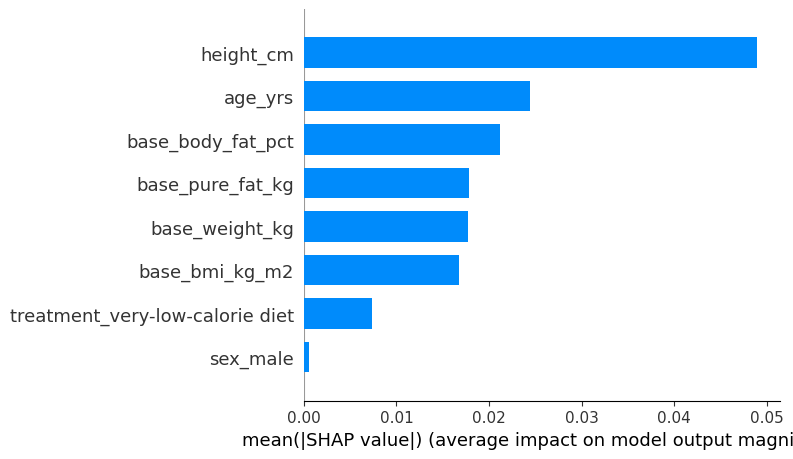

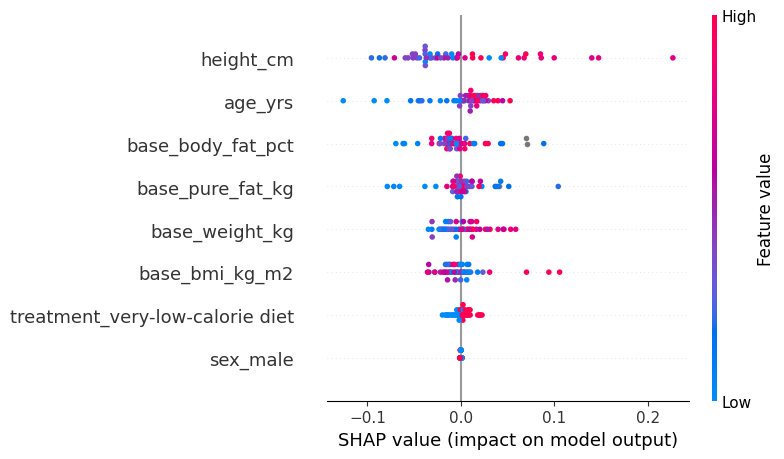

🧬 SHAP for: MC4R


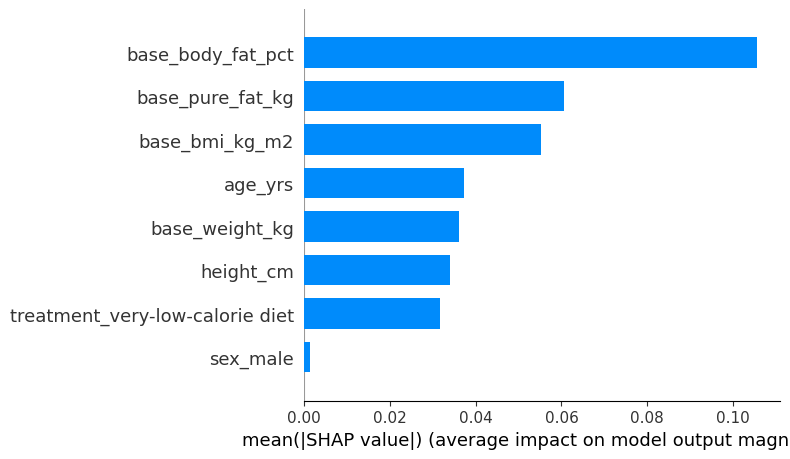

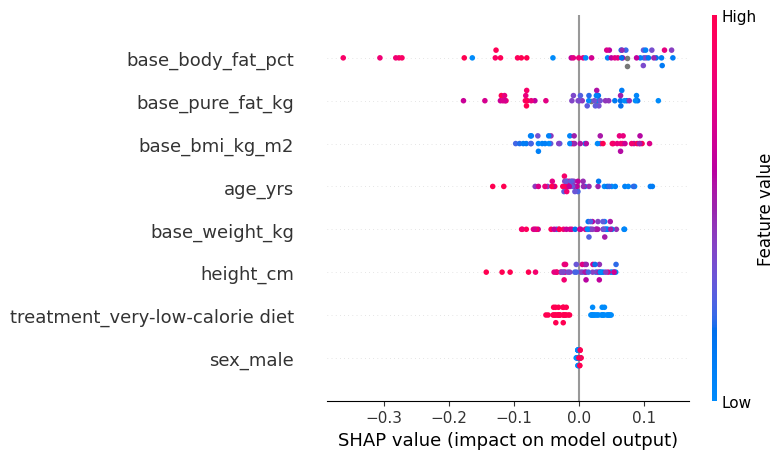

🧬 SHAP for: LEP


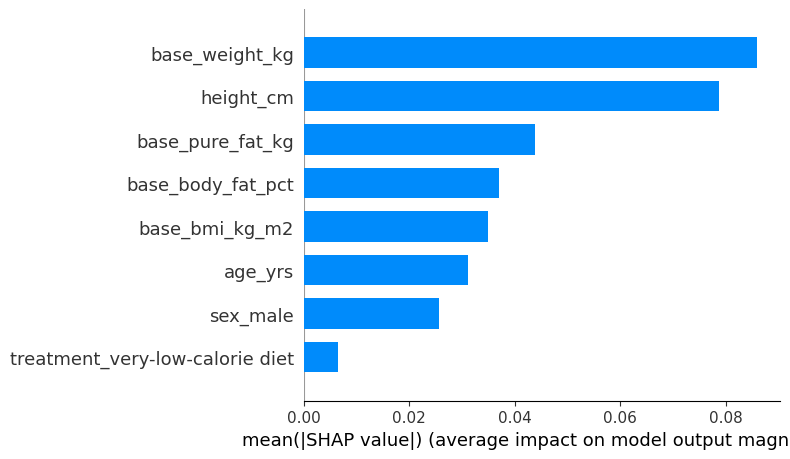

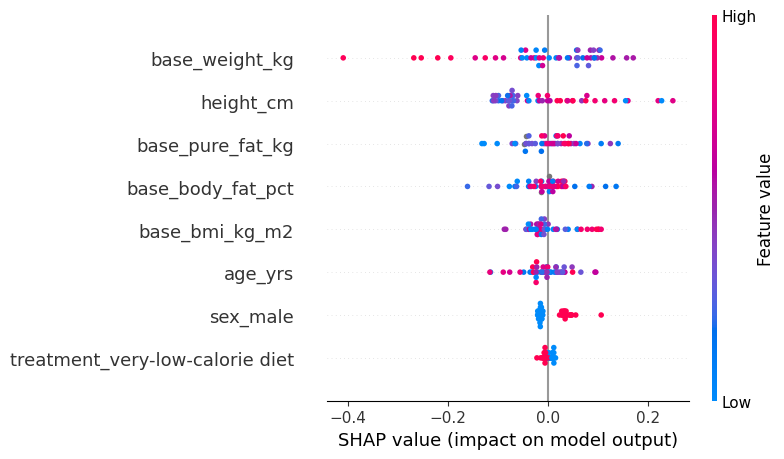

🧬 SHAP for: LEPR


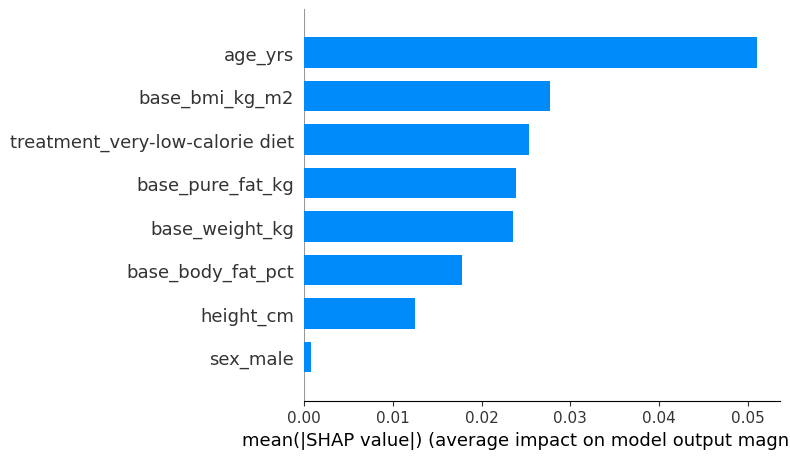

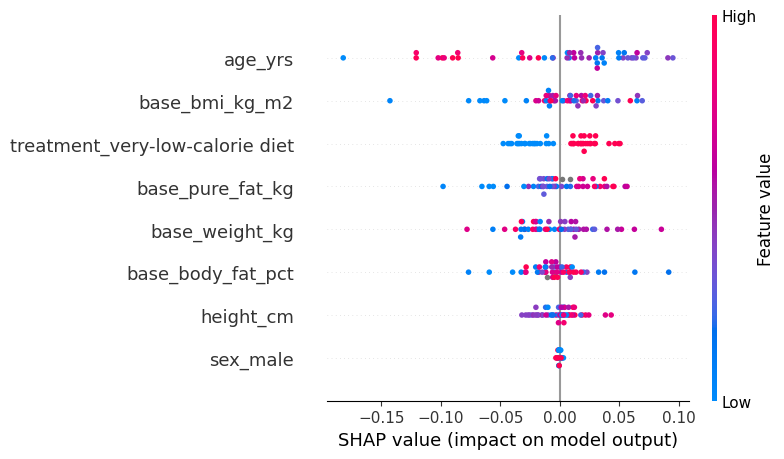

🧬 SHAP for: ADIPOQ


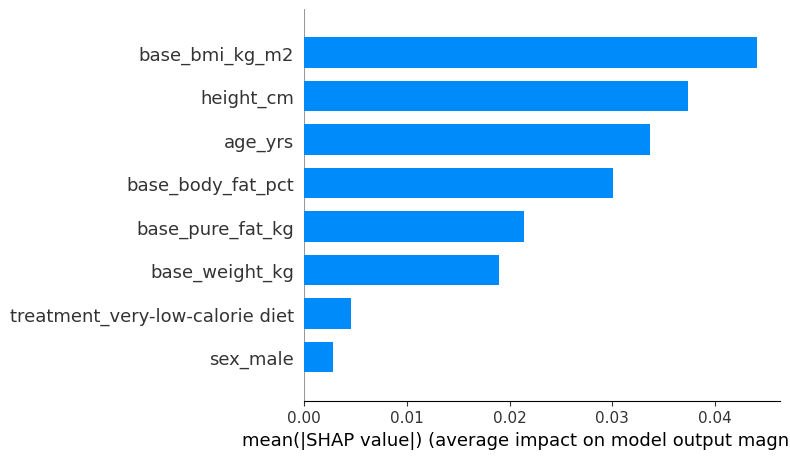

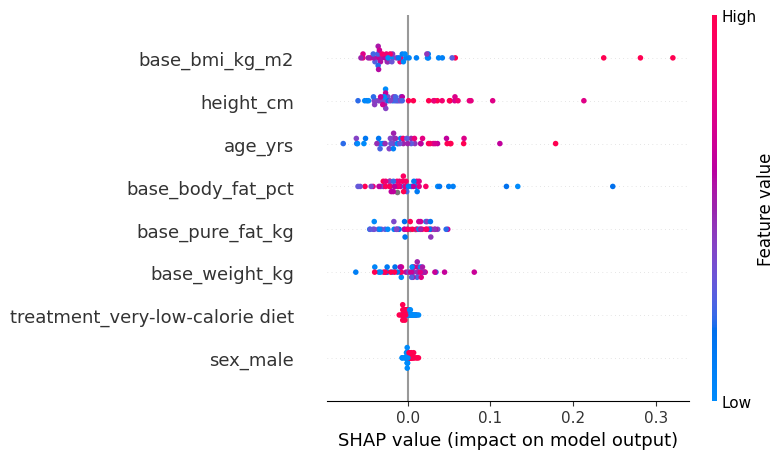

🧬 SHAP for: PPARG


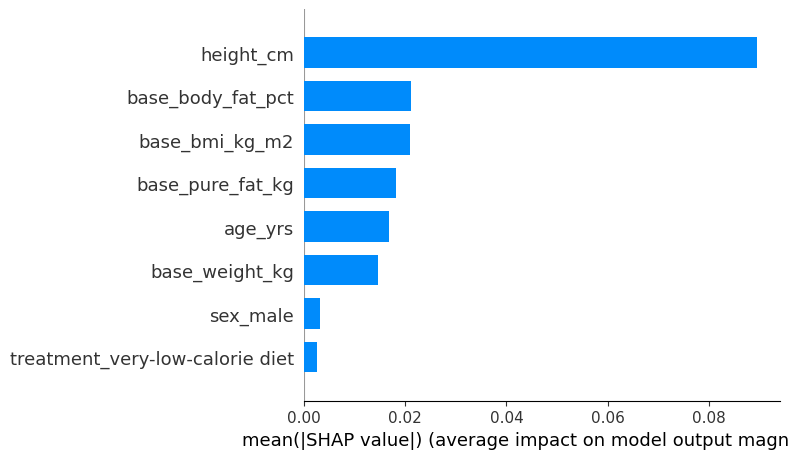

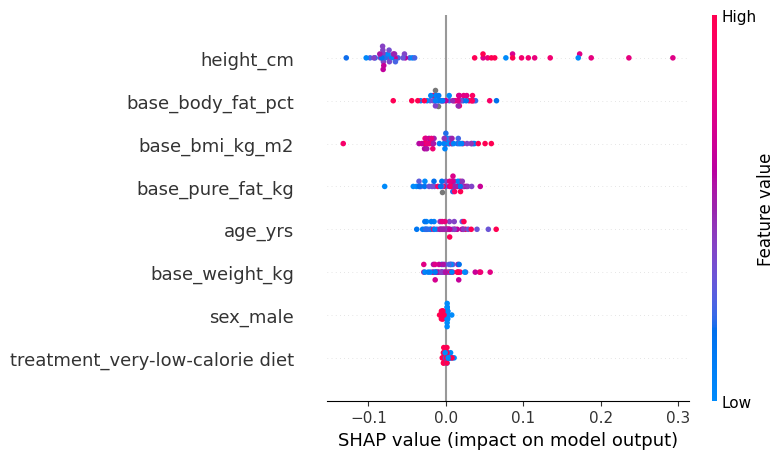

🧬 SHAP for: UCP1


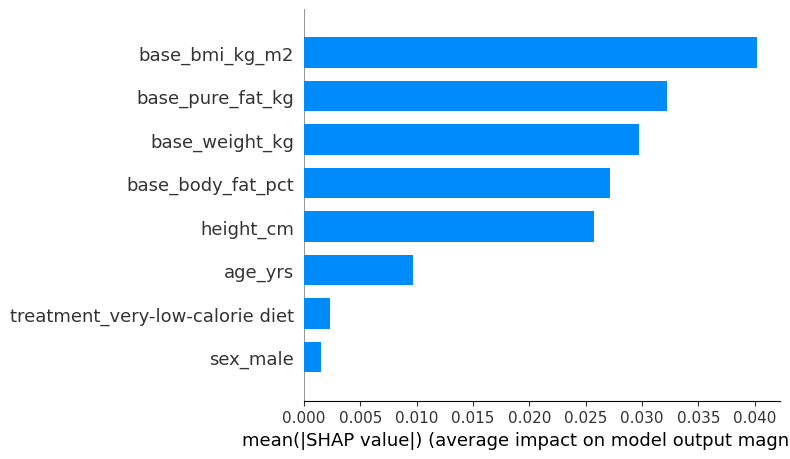

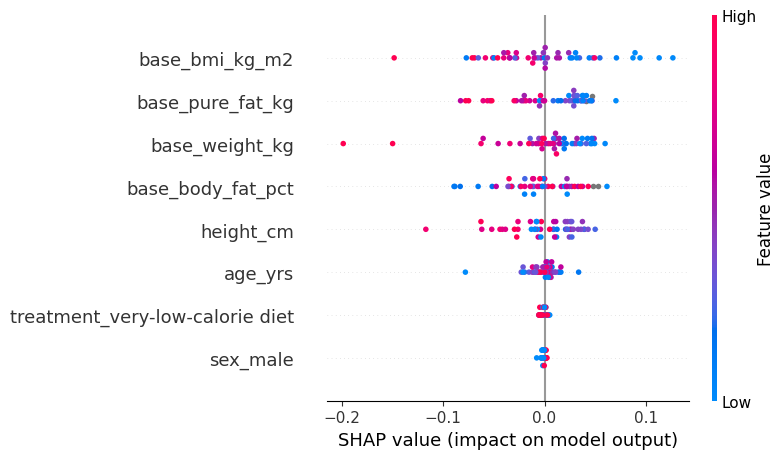

🧬 SHAP for: UCP2


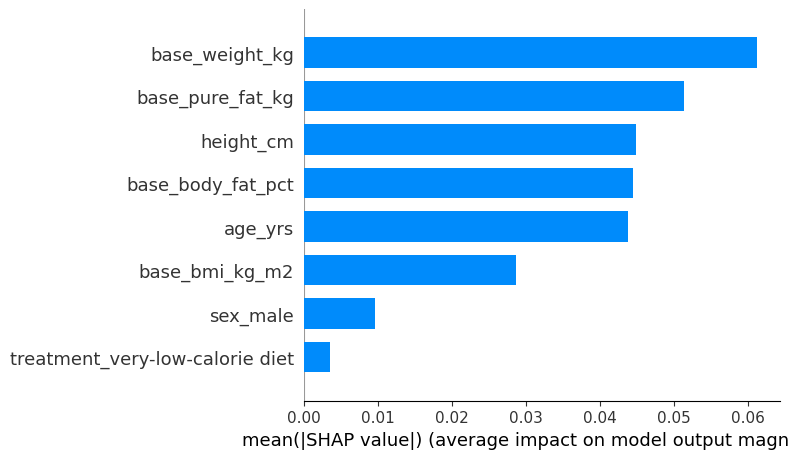

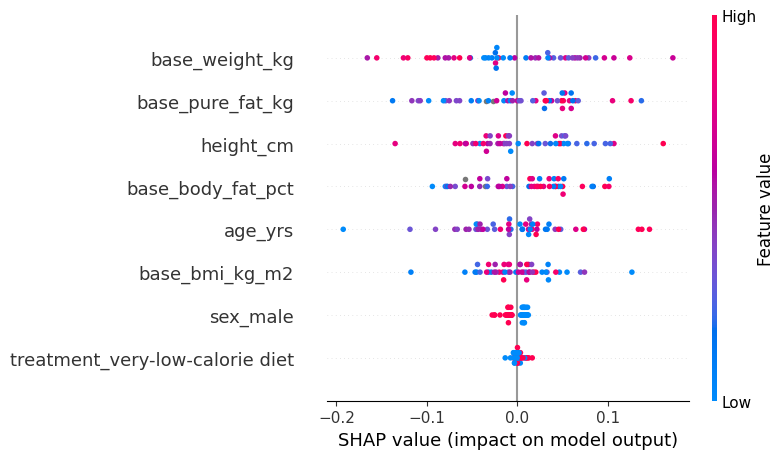

🧬 SHAP for: BDNF


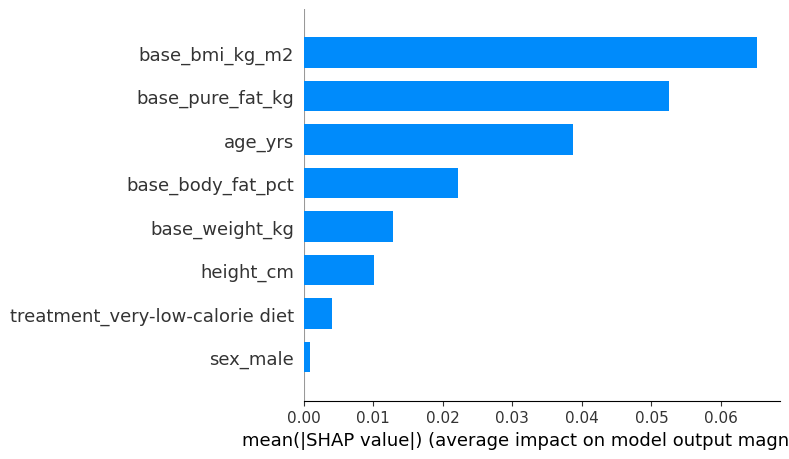

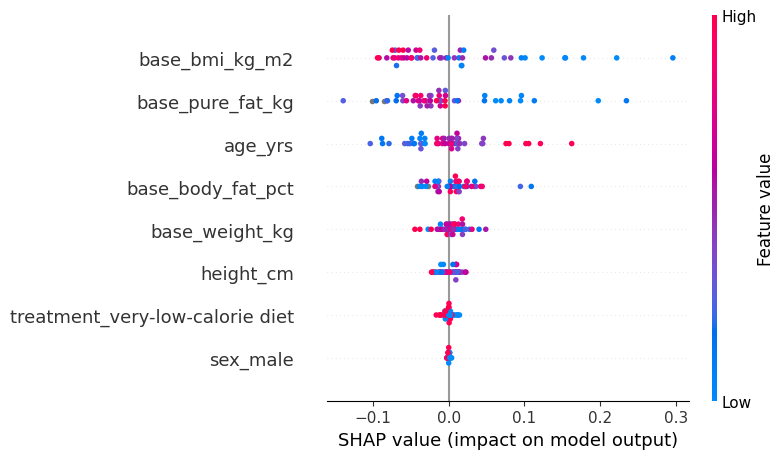

🧬 SHAP for: GNPDA2


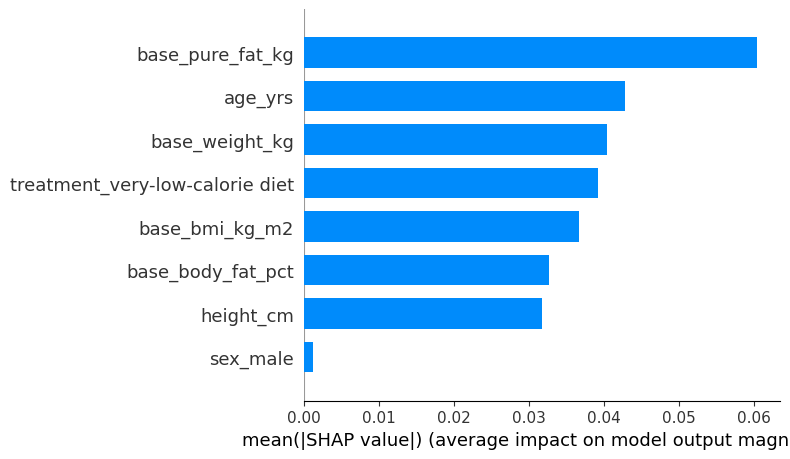

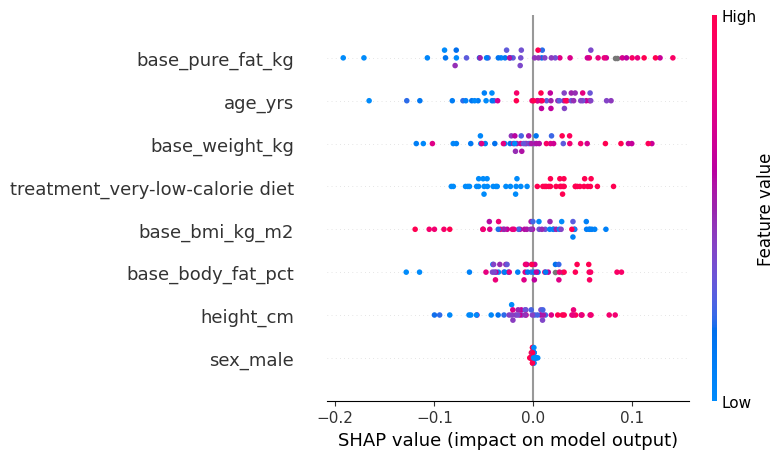

🧬 SHAP for: TMEM18


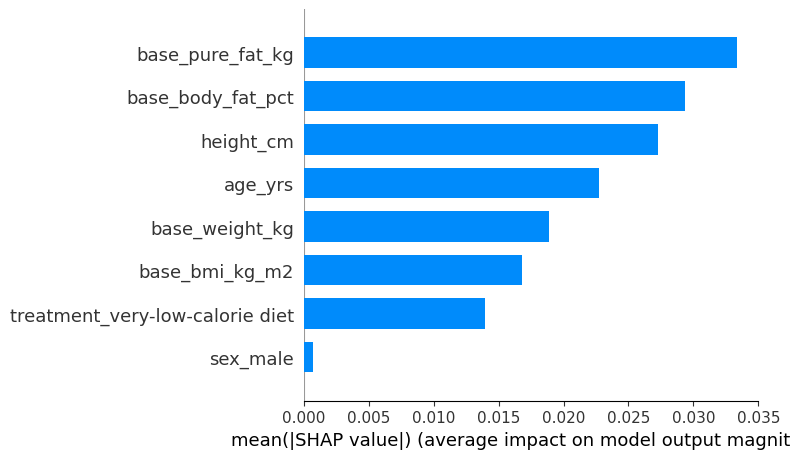

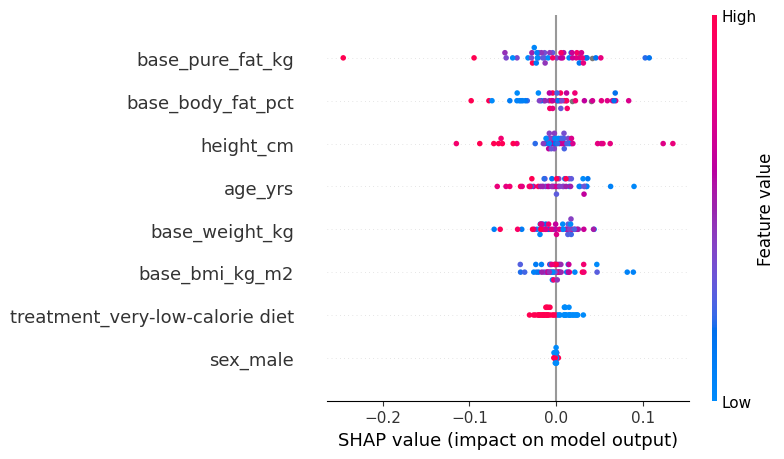

🧬 SHAP for: NEGR1


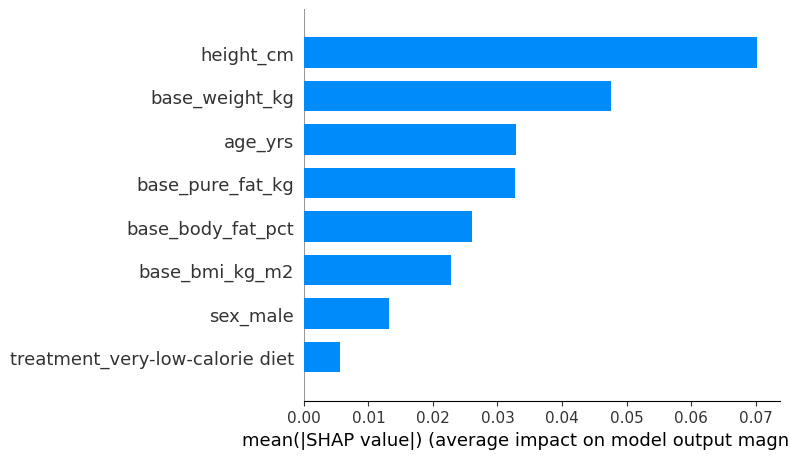

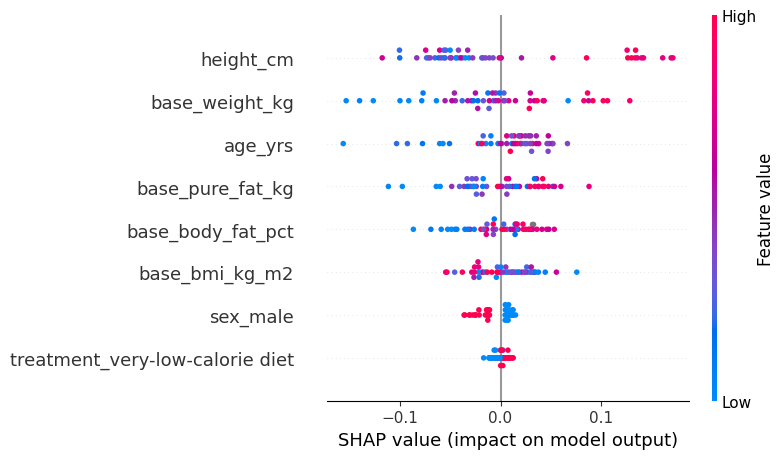

In [104]:
# 유전자별로 SHAP 시각화
for i, gene_name in enumerate(obesity_genes):  # 여기서 바로 유전자 이름 사용!
    print(f"🧬 SHAP for: {gene_name}")

    explainer = shap.TreeExplainer(model.estimators_[i])
    shap_values = explainer.shap_values(X_common)

    # summary plot with gene name as title
    shap.summary_plot(shap_values, X_common, plot_type="bar", show=True)
    shap.summary_plot(shap_values, X_common, show=True)

각 유전자 모델별로 SHAP값의 절댓값 평균을 계산하여, feature importance를 12개 유전자 전체에 대해 비교


유용성:
유전자별로 민감한 feature가 다를 경우, 이를 클러스터링하거나 그룹핑하여 해석에 활용 가능. 논문 Figure나 발표용 시각화로도 매우 적합

In [105]:
shap_matrix = pd.DataFrame(
    [
        # 각 유전자(target 변수)에 대해 개별 모델에서 SHAP 값 계산
        np.abs(
            shap.TreeExplainer(model.estimators_[i])  # i번째 유전자에 대한 모델로 explainer 생성
            .shap_values(X_common)                      # 해당 모델에 대한 SHAP 값 계산 (모든 sample에 대해)
        ).mean(axis=0)                                 # 각 feature에 대해 SHAP 값의 평균(절댓값) 계산
        for i in range(12)                             # 총 12개의 비만 관련 유전자에 대해 반복
    ],
    columns=X_common.columns,   # 각 열 이름은 X_common의 feature 이름들 (예: sex, age, height 등)
    index=obesity_genes        # 각 행 이름은 유전자 이름 리스트 (예: FTO, LEP, MC4R 등)
)

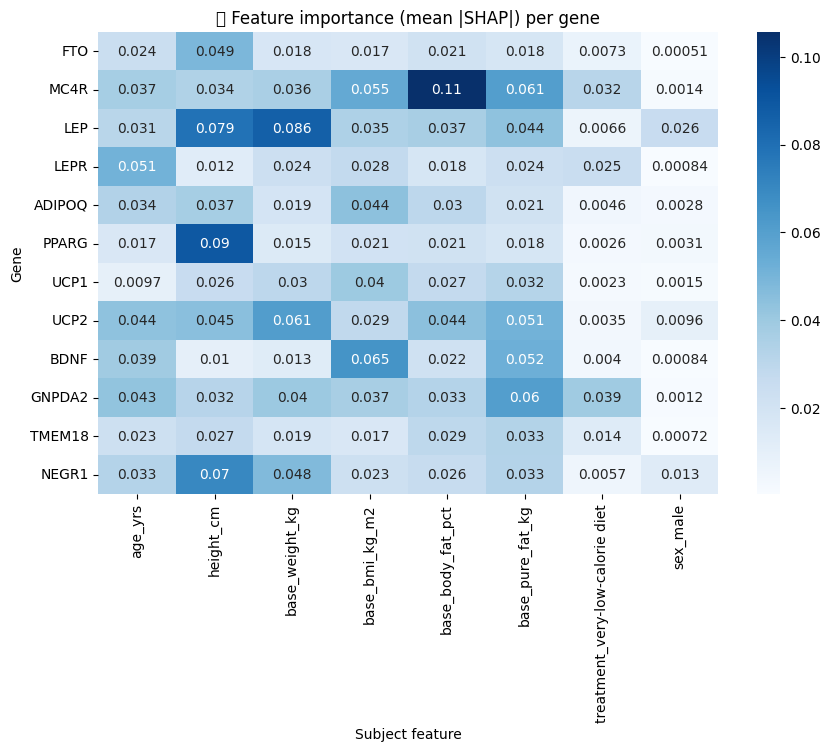

In [106]:
plt.figure(figsize=(10, 6))
sns.heatmap(shap_matrix, cmap="Blues", annot=True)
plt.title("Feature importance (mean |SHAP|) per gene")
plt.xlabel("Subject feature")
plt.ylabel("Gene")
plt.show()

### 메타정보 feature에 대한 유전자별 SHAP벡터 PCA분석

In [107]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA (유전자 × feature → 2D)
pca = PCA(n_components=2)
gene_pca = pca.fit_transform(gene_feature_shap_df)  # or zscore_df

# KMeans Clustering (군집 개수는 적절히 튜닝)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(gene_pca)

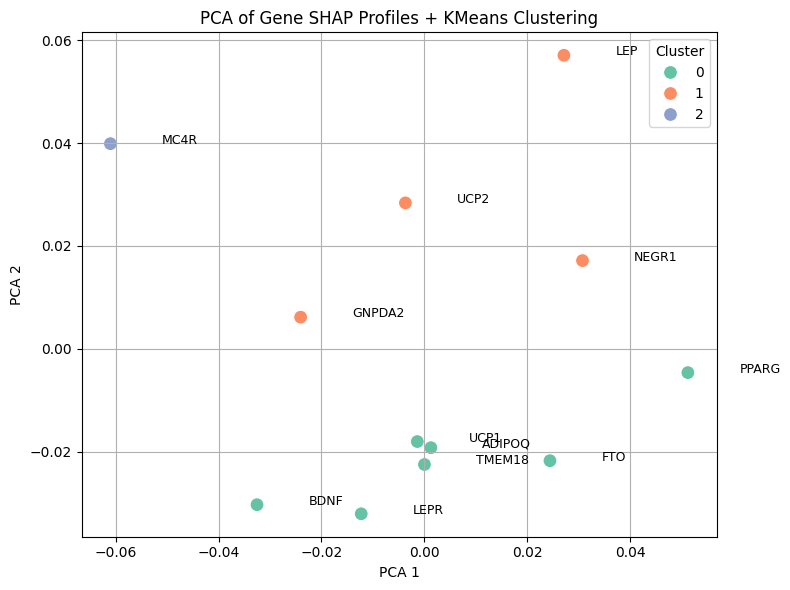

In [108]:
# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=gene_pca[:, 0], y=gene_pca[:, 1],
                hue=clusters, palette="Set2", s=100)

# 유전자 이름 라벨링
for i, gene in enumerate(gene_feature_shap_df.index):
    plt.text(gene_pca[i, 0] + 0.01, gene_pca[i, 1], gene, fontsize=9)

plt.title("PCA of Gene SHAP Profiles + KMeans Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
# 얼마나 정보를 유지했는지 확인
print("주성분 설명력:", pca.explained_variance_ratio_)
print("누적 설명력:", pca.explained_variance_ratio_.sum())

주성분 설명력: [0.37599559 0.34711967]
누적 설명력: 0.7231152595816785


In [110]:
# 각 주성분(PCA_1, PCA_2)이 어떤 feature로 구성됐는지 확인
pca_df = pd.DataFrame(pca.components_, columns=gene_feature_shap_df.columns, index=["PCA_1", "PCA_2"])

In [112]:
pca_df.shape

(2, 8)

In [111]:
pca_df

,age_yrs,height_cm,base_weight_kg,base_bmi_kg_m2,base_body_fat_pct,base_pure_fat_kg,treatment_very-low-calorie diet,sex_male
PCA_1,-0.192161,0.633265,0.082601,-0.352813,-0.471925,-0.363564,-0.254822,0.104515
PCA_2,0.058816,0.469992,0.645294,0.035757,0.487338,0.284086,0.054158,0.191909


In [114]:
# 영향력 큰 feature 보기 ex> PCA_1에 가장 큰 영향을 준 feature순
print(pca_df.T.sort_values("PCA_1", ascending=False).head())

                                    PCA_1     PCA_2
height_cm                        0.633265  0.469992
sex_male                         0.104515  0.191909
base_weight_kg                   0.082601  0.645294
age_yrs                         -0.192161  0.058816
treatment_very-low-calorie diet -0.254822  0.054158


In [116]:
# 클러스터 번호를 gene_feature_shap_df에 추가
gene_clustered_df = gene_feature_shap_df.copy()
gene_clustered_df["cluster"] = clusters

# 클러스터 단위로 그룹화 후 평균 SHAP 계산
cluster_feature_mean = gene_clustered_df.groupby("cluster").mean()

# 각 클러스터에서 중요도가 높은 대표 feature 3개씩 출력
for cluster_id, row in cluster_feature_mean.iterrows(): # 각 클러스터별 평균 SHAP 행 반복
    top_features = row.sort_values(ascending=False).head(3) #상위 3개
    print(f"\nCluster {cluster_id}의 대표 SHAP feature:")
    for feat, val in top_features.items():  # 대표 feature와 해당 SHAP 값 출력
        print(f"  - {feat}: {val:.4f}")


Cluster 0의 대표 SHAP feature:
  - height_cm: 0.0359
  - base_bmi_kg_m2: 0.0331
  - base_pure_fat_kg: 0.0285

Cluster 1의 대표 SHAP feature:
  - base_weight_kg: 0.0588
  - height_cm: 0.0564
  - base_pure_fat_kg: 0.0471

Cluster 2의 대표 SHAP feature:
  - base_body_fat_pct: 0.1056
  - base_pure_fat_kg: 0.0606
  - base_bmi_kg_m2: 0.0552


이후 실험에서 실제로 12개의 비만유전자의 SHAP가 결과지표에 큰영향을 미치지 않는다는 것을 밝힘.

따라서 위 실험을 다시 시행한다면, 유전자 발현량- 결과지표 간의 SHAP영향력이 큰 유전자와 메타정보의 feature의 SHAP값을 분석하여 '유전자 별 민감 메타정보 특성' 또는 '메타정보 feature별 유전자 특성'을 구한다면 매우 유효한 인사이트가 될 것이라고 생각함.
